<a href="https://colab.research.google.com/github/thulasi-bikku/Extract_Table_from_PDF/blob/main/organic_attributes_7_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,KBinsDiscretizer,OneHotEncoder,StandardScaler
 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
 
from sklearn.metrics import confusion_matrix,recall_score
from sklearn.compose import ColumnTransformer
 
from scipy import stats
 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df = pd.read_excel('/content/ORGANIC.xlsx')
df.head()

,shelf,book,page,λ,n,k
0,organic,(C2ClF3)n - polychlorotrifluoroethylene,Smith,0.0900,1.196,0.6096
1,organic,(C2ClF3)n - polychlorotrifluoroethylene,Smith,0.0900,1.209,0.6501
2,organic,(C2ClF3)n - polychlorotrifluoroethylene,Smith,0.0900,1.228,0.7096
3,organic,(C2ClF3)n - polychlorotrifluoroethylene,Smith,0.0900,1.235,0.7315
4,organic,(C2ClF3)n - polychlorotrifluoroethylene,Smith,0.1012,1.417,0.4472


In [ ]:
df['k'].fillna(0,inplace=True)
df.dropna(axis=0,inplace=True)   #drop null values from n
df.drop(['shelf','page'],axis=1,inplace=True)

In [ ]:
df.head()

,book,λ,n,k
0,(C2ClF3)n - polychlorotrifluoroethylene,0.0900,1.196,0.6096
1,(C2ClF3)n - polychlorotrifluoroethylene,0.0900,1.209,0.6501
2,(C2ClF3)n - polychlorotrifluoroethylene,0.0900,1.228,0.7096
3,(C2ClF3)n - polychlorotrifluoroethylene,0.0900,1.235,0.7315
4,(C2ClF3)n - polychlorotrifluoroethylene,0.1012,1.417,0.4472


In [ ]:
df.sort_values(['book','λ']).reset_index(drop=True,inplace=True)

In [ ]:
df.head()

,book,λ,n,k
0,(C2ClF3)n - polychlorotrifluoroethylene,0.0900,1.196,0.6096
1,(C2ClF3)n - polychlorotrifluoroethylene,0.0900,1.209,0.6501
2,(C2ClF3)n - polychlorotrifluoroethylene,0.0900,1.228,0.7096
3,(C2ClF3)n - polychlorotrifluoroethylene,0.0900,1.235,0.7315
4,(C2ClF3)n - polychlorotrifluoroethylene,0.1012,1.417,0.4472


In [ ]:
df['book'].nunique()

61

In [ ]:
print(df['book'].unique())

['(C2ClF3)n - polychlorotrifluoroethylene' '(C6H12)n - polymethylpentene'
 'acetic_acid' 'acetone' 'acetonitrile' 'Acetylene' 'benzene' 'bromoform'
 'butanol' 'carbon_tetrachloride' 'cellulose' 'chloroform'
 'cinnamaldehyde' 'Cyclohexane' 'dichloromethane' 'diethyl_phthalate'
 'diethyl_sulfite' 'diisopropyl_methylphosphonate'
 'diisopropylaminoethanol' 'dimethyl_methylphosphonate'
 'dimethyl_sulfoxide' 'dioxane' 'ethane' 'ethanol' 'Ethyl acetate'
 'ethyl_cinnamate' 'ethyl_salicylate' 'Ethylene' 'ethylene_glycol'
 'glycerol' 'Heptane' 'Hexane' 'methane' 'Methanol' 'methyl_salicylate'
 'nitrobenzene' 'octane' 'oxathiane' 'pentane' 'pentanediol'
 'Pentanol, amyl alcohol' 'poly(methyl_methacrylate)'
 'poly(N-isopropylacrylamide)' 'polycarbonate' 'polydimethylsiloxane'
 'polyetherimide' 'polyethylene' 'polyethylene_terephthalate'
 'polylactic_acid' 'polymethylpentene' 'polystyren' 'polyvinil_chloride'
 'polyvinyl_alcohol' 'polyvinylpyrrolidone' 'potassium_hydrogen_phthalate'
 'propanol' 'pr

In [ ]:

dct = {'book':[],
       'λ1':[],
       'λ2' : [],
       'n1' : [],
       'n2' : [],
       'k1' : [],
       'k2' : []}

grp = df.groupby('book')   #group the data by books
grp_names = list(grp.groups.keys())

for i in grp_names:
  x = grp.get_group(i).reset_index(drop=True)
  i = 0
  j = 2

  for d in range(x.shape[0]):
   # print(i,j)
    if j >= x.shape[0]:
      break

    for v in x.iloc[i:j].iteritems():
      
      if v[0] == 'book':
     #  print(v[1])
        dct['book'].append(v[1].unique()[0])

      if v[0] == 'λ':
        dct['λ1'].append(list(v[1])[0])
        dct['λ2'].append(list(v[1])[1])
        

      if v[0] == 'n':
        dct['n1'].append(list(v[1])[0])
        dct['n2'].append(list(v[1])[1])
        

      if v[0] == 'k':
        dct['k1'].append(list(v[1])[0])
        dct['k2'].append(list(v[1])[1])
       
    i += 2 
    j += 2

  
  # print('-'*60)
  # print(y)
  # break

In [ ]:
new_df = pd.DataFrame(dct)
new_df.head()

,book,λ1,λ2,n1,n2,k1,k2
0,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.09000,1.196,1.209,0.6096,0.6501
1,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.09000,1.228,1.235,0.7096,0.7315
2,(C2ClF3)n - polychlorotrifluoroethylene,0.10120,0.10000,1.417,1.420,0.4472,0.4551
3,(C2ClF3)n - polychlorotrifluoroethylene,0.08266,0.08266,1.440,1.440,0.8090,0.8090
4,(C2ClF3)n - polychlorotrifluoroethylene,0.11620,0.10120,1.442,1.446,0.3024,0.4768


In [ ]:
new_df.tail()

,book,λ1,λ2,n1,n2,k1,k2
122595,urea,0.9764,0.9840,1.481836,1.481763,0.0,0.0
122596,urea,0.9916,0.9992,1.481693,1.481623,0.0,0.0
122597,urea,1.0070,1.0140,1.481554,1.481493,0.0,0.0
122598,urea,1.0220,1.0300,1.481426,1.481359,0.0,0.0
122599,urea,1.0370,1.0450,1.481303,1.481239,0.0,0.0


In [ ]:
new_df.to_csv('new_organic_data7.csv',index=False)

In [ ]:
new_data = pd.read_csv('new_organic_data7.csv')

In [ ]:
new_data.shape

(122600, 7)

In [ ]:
new_data.isnull().sum()

book    0
λ1      0
λ2      0
n1      0
n2      0
k1      0
k2      0
dtype: int64

# **Modelling and Evaluation 7 attributes**

In [ ]:
new_df = new_data.copy()
y = new_df['book']
x = new_df.drop('book',axis=1)

In [ ]:
#split the data for training and testing
from sklearn.metrics import accuracy_score,classification_report
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

In [ ]:
numeric_features = [ 'λ1','λ2','n1','n2','k1','k2']

In [ ]:
#preprocessing and training pipeline with our own bins

numeric_transformer = Pipeline(steps=[
                                      ('scaler', StandardScaler())
                                      ])

# categorical_transformer = Pipeline(steps=[
#                                           ('onehot',OneHotEncoder())
#                                           ])

preprocessor = ColumnTransformer(
    transformers=[
                  ('numeric', numeric_transformer, numeric_features),   #apply the transformation
                  # ('category',categorical_transformer,cat_features)
                  ]) 

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestClassifier())
           ])

In [ ]:
rf_model = pipeline.fit(x_train, y_train)
print (rf_model)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['λ1', 'λ2', 'n1', 'n2', 'k1',
                                                   'k2'])],
                                   verbose=F

In [ ]:
print(f'Training accuracy is : {rf_model.score(x_train,y_train)}')
print(f'Testing accuracy is : {rf_model.score(x_test,y_test)}')

Training accuracy is : 0.9919630233822729
Testing accuracy is : 0.9017618270799348


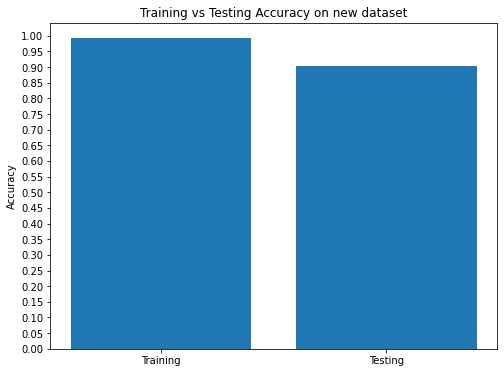

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(['Training','Testing'],[rf_model.score(x_train,y_train),rf_model.score(x_test,y_test)])
plt.title('Training vs Testing Accuracy on new dataset')
plt.yticks(np.arange(0,1.05,0.05))
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

test_pred = rf_model.predict(x_test)
print(f"Precision score {precision_score(y_test,test_pred,average='weighted')}")
print(f"Recall score {recall_score(y_test,test_pred,average='weighted')}")
print(f"F1 score {f1_score(y_test,test_pred,average='weighted')}")

Precision score 0.9007887942199435
Recall score 0.9017618270799348
F1 score 0.9008890785083611


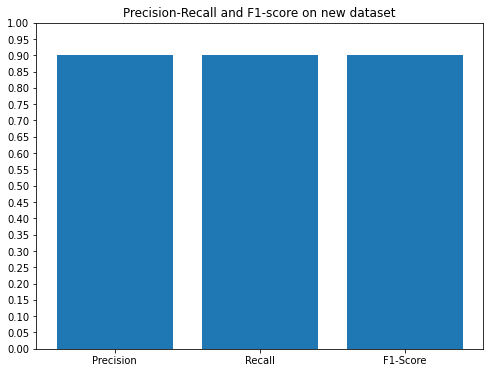

In [ ]:
plt.figure(figsize=(8,6))

plt.bar(['Precision','Recall','F1-Score'],
        [precision_score(y_test,test_pred,average='weighted'),
                                           recall_score(y_test,test_pred,average='weighted'),
                                           f1_score(y_test,test_pred,average='weighted')])

plt.title('Precision-Recall and F1-score on new dataset')
plt.yticks(np.arange(0,1.05,0.05))
plt.show()

In [ ]:
x_test[0:2]

,λ1,λ2,n1,n2,k1,k2
101910,1.88212,1.88229,1.51593,1.51593,0.000039,0.000039
39628,4.35079,4.35170,1.38812,1.38811,0.000439,0.000435


In [ ]:
y_test[0:2]

101910                       styrene
39628     dimethyl_methylphosphonate
Name: book, dtype: object

In [ ]:
rf_model.predict(x_test[0:2])

array(['styrene', 'dimethyl_methylphosphonate'], dtype=object)

**Modelling and Evaluation 10 attributes**

In [ ]:
df = pd.read_excel('/content/ORGANIC.xlsx')
df.head()

,shelf,book,page,λ,n,k
0,organic,(C2ClF3)n - polychlorotrifluoroethylene,Smith,0.0900,1.196,0.6096
1,organic,(C2ClF3)n - polychlorotrifluoroethylene,Smith,0.0900,1.209,0.6501
2,organic,(C2ClF3)n - polychlorotrifluoroethylene,Smith,0.0900,1.228,0.7096
3,organic,(C2ClF3)n - polychlorotrifluoroethylene,Smith,0.0900,1.235,0.7315
4,organic,(C2ClF3)n - polychlorotrifluoroethylene,Smith,0.1012,1.417,0.4472


In [ ]:
df['k'].fillna(0,inplace=True)
df.dropna(axis=0,inplace=True)   #drop null values from n
df.drop(['shelf','page'],axis=1,inplace=True)

In [ ]:
df.head()

,book,λ,n,k
0,(C2ClF3)n - polychlorotrifluoroethylene,0.0900,1.196,0.6096
1,(C2ClF3)n - polychlorotrifluoroethylene,0.0900,1.209,0.6501
2,(C2ClF3)n - polychlorotrifluoroethylene,0.0900,1.228,0.7096
3,(C2ClF3)n - polychlorotrifluoroethylene,0.0900,1.235,0.7315
4,(C2ClF3)n - polychlorotrifluoroethylene,0.1012,1.417,0.4472


In [ ]:
df.sort_values(['book','λ']).reset_index(drop=True,inplace=True)

In [ ]:
df.head()

,book,λ,n,k
0,(C2ClF3)n - polychlorotrifluoroethylene,0.0900,1.196,0.6096
1,(C2ClF3)n - polychlorotrifluoroethylene,0.0900,1.209,0.6501
2,(C2ClF3)n - polychlorotrifluoroethylene,0.0900,1.228,0.7096
3,(C2ClF3)n - polychlorotrifluoroethylene,0.0900,1.235,0.7315
4,(C2ClF3)n - polychlorotrifluoroethylene,0.1012,1.417,0.4472


In [ ]:

dct = {'book':[],
       'λ1':[],
       'λ2' : [],
       'λ3' : [],
       'n1' : [],
       'n2' : [],
       'n3' : [],
       'k1' : [],
       'k2' : [],
       'k3' : []}

grp = df.groupby('book')   #group the data by books
grp_names = list(grp.groups.keys())

for i in grp_names:
  x = grp.get_group(i).reset_index(drop=True)
  i = 0
  j = 3

  for d in range(x.shape[0]):
   # print(i,j)
    if j >= x.shape[0]:
      break

    for v in x.iloc[i:j].iteritems():
      
      if v[0] == 'book':
     #  print(v[1])
        dct['book'].append(v[1].unique()[0])

      if v[0] == 'λ':
        dct['λ1'].append(list(v[1])[0])
        dct['λ2'].append(list(v[1])[1])
        dct['λ3'].append(list(v[1])[2])

      if v[0] == 'n':
        dct['n1'].append(list(v[1])[0])
        dct['n2'].append(list(v[1])[1])
        dct['n3'].append(list(v[1])[2])

      if v[0] == 'k':
        dct['k1'].append(list(v[1])[0])
        dct['k2'].append(list(v[1])[1])
        dct['k3'].append(list(v[1])[2])
    i += 3 
    j += 3

  
  # print('-'*60)
  # print(y)
  # break

In [ ]:
new_df = pd.DataFrame(dct)
new_df.head()

,book,λ1,λ2,λ3,n1,n2,n3,k1,k2,k3
0,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.09000,0.0900,1.196,1.209,1.228,0.6096,0.6501,0.7096
1,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.10120,0.1000,1.235,1.417,1.420,0.7315,0.4472,0.4551
2,(C2ClF3)n - polychlorotrifluoroethylene,0.08266,0.08266,0.1162,1.440,1.440,1.442,0.8090,0.8090,0.3024
3,(C2ClF3)n - polychlorotrifluoroethylene,0.10120,0.10000,0.1200,1.446,1.448,1.455,0.4768,0.4853,0.3128
4,(C2ClF3)n - polychlorotrifluoroethylene,0.11620,0.10870,0.1012,1.472,1.476,1.486,0.3225,0.3527,0.5203


In [ ]:
new_df.tail()

,book,λ1,λ2,λ3,n1,n2,n3,k1,k2,k3
81716,urea,0.9460,0.9536,0.9612,1.482144,1.482064,1.481986,0.0,0.0,0.0
81717,urea,0.9688,0.9764,0.9840,1.481910,1.481836,1.481763,0.0,0.0,0.0
81718,urea,0.9916,0.9992,1.0070,1.481693,1.481623,1.481554,0.0,0.0,0.0
81719,urea,1.0140,1.0220,1.0300,1.481493,1.481426,1.481359,0.0,0.0,0.0
81720,urea,1.0370,1.0450,1.0520,1.481303,1.481239,1.481185,0.0,0.0,0.0


In [ ]:
new_df.to_csv('new_organic_data10.csv',index=False)

In [ ]:
new_data = pd.read_csv('new_organic_data10.csv')

In [ ]:
new_data.shape

(81721, 10)

In [ ]:
new_data.isnull().sum()

book    0
λ1      0
λ2      0
λ3      0
n1      0
n2      0
n3      0
k1      0
k2      0
k3      0
dtype: int64

## Modelling and Evaluation

In [ ]:
new_df = new_data.copy()
y = new_df['book']
x = new_df.drop('book',axis=1)

In [ ]:
#split the data for training and testing
from sklearn.metrics import accuracy_score,classification_report
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

In [ ]:
numeric_features = [ 'λ1','λ2','λ3','n1','n2','n3','k1','k2','k3']

In [ ]:
#preprocessing and training pipeline with our own bins

numeric_transformer = Pipeline(steps=[
                                      ('scaler', StandardScaler())
                                      ])

# categorical_transformer = Pipeline(steps=[
#                                           ('onehot',OneHotEncoder())
#                                           ])

preprocessor = ColumnTransformer(
    transformers=[
                  ('numeric', numeric_transformer, numeric_features),   #apply the transformation
                  # ('category',categorical_transformer,cat_features)
                  ]) 

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestClassifier())
           ])

In [ ]:
rf_model = pipeline.fit(x_train, y_train)
print (rf_model)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['λ1', 'λ2', 'λ3', 'n1', 'n2',
                                                   'n3', 'k1', 'k2', 'k3'])],
                          

In [ ]:
print(f'Training accuracy is : {rf_model.score(x_train,y_train)}')
print(f'Testing accuracy is : {rf_model.score(x_test,y_test)}')

Training accuracy is : 0.9968836678087779
Testing accuracy is : 0.9048994175517596


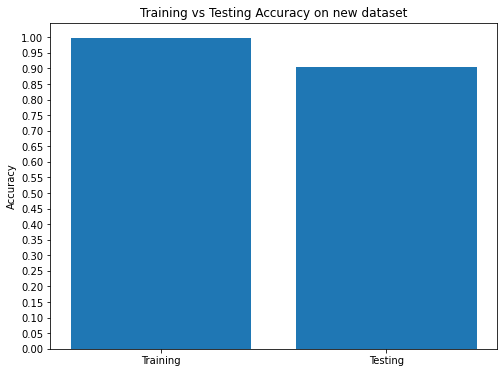

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(['Training','Testing'],[rf_model.score(x_train,y_train),rf_model.score(x_test,y_test)])
plt.title('Training vs Testing Accuracy on new dataset')
plt.yticks(np.arange(0,1.05,0.05))
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

test_pred = rf_model.predict(x_test)
print(f"Precision score {precision_score(y_test,test_pred,average='weighted')}")
print(f"Recall score {recall_score(y_test,test_pred,average='weighted')}")
print(f"F1 score {f1_score(y_test,test_pred,average='weighted')}")

Precision score 0.9043874565092558
Recall score 0.9048994175517596
F1 score 0.9039526963316936


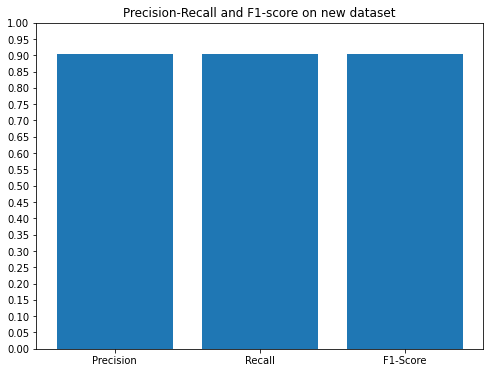

In [ ]:
plt.figure(figsize=(8,6))

plt.bar(['Precision','Recall','F1-Score'],
        [precision_score(y_test,test_pred,average='weighted'),
                                           recall_score(y_test,test_pred,average='weighted'),
                                           f1_score(y_test,test_pred,average='weighted')])

plt.title('Precision-Recall and F1-score on new dataset')
plt.yticks(np.arange(0,1.05,0.05))
plt.show()

In [ ]:
x_test[0:2]

,λ1,λ2,λ3,n1,n2,n3,k1,k2,k3
80566,5.06498,5.06621,5.06745,1.54039,1.54037,1.54037,0.000117,0.000118,0.000119
11541,1.40134,1.40144,1.40153,1.47777,1.47777,1.47777,0.000021,0.000020,0.000020


In [ ]:
y_test[0:2]

80566    trichlorobenzene
11541             benzene
Name: book, dtype: object

In [ ]:
rf_model.predict(x_test[0:2])

array(['trichlorobenzene', 'benzene'], dtype=object)